In [3]:
import numpy as np
import pandas as pd
import pylab as pl
from sklearn.model_selection import train_test_split
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv("cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


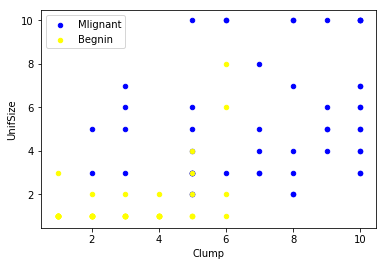

In [11]:
ax=df[df['Class']==4][0:50].plot(kind='scatter',x='Clump',y='UnifSize',color='Blue',label='Mlignant');
df[df['Class']==2][0:50].plot(kind='scatter',x='Clump',y='UnifSize',color='Yellow',label='Begnin',ax=ax)

In [14]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [19]:
df=df[pd.to_numeric(df['BareNuc'],errors='coerce').notnull()]
df['BareNuc']=df['BareNuc'].astype('int')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [20]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [22]:
X=df[['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X=np.asarray(X)
X[0:5]

array([[1000025,       5,       1,       1,       1,       2,       1,
              3,       1,       1],
       [1002945,       5,       4,       4,       5,       7,      10,
              3,       2,       1],
       [1015425,       3,       1,       1,       1,       2,       2,
              3,       1,       1],
       [1016277,       6,       8,       8,       1,       3,       4,
              3,       7,       1],
       [1017023,       4,       1,       1,       3,       2,       1,
              3,       1,       1]], dtype=int64)

In [25]:
Y=df[['Class']]
Y=np.asarray(Y.astype('int'))
Y[0:5]

array([[2],
       [2],
       [2],
       [2],
       [2]])

In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=4,test_size=0.2)

In [43]:
from sklearn import svm

In [44]:
clf=svm.SVC(kernel='rbf')
clf.fit(X_train,Y_train)

F:\Installed Softwares\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Installed Softwares\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [45]:
y_hat=clf.predict(X_test)
y_hat

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2])

In [46]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score,jaccard_similarity_score

In [53]:
print(confusion_matrix(Y_test,y_hat,labels=[2,4]))

[[90  0]
 [47  0]]


In [54]:
print(classification_report(Y_test,y_hat))

              precision    recall  f1-score   support

           2       0.66      1.00      0.79        90
           4       0.00      0.00      0.00        47

    accuracy                           0.66       137
   macro avg       0.33      0.50      0.40       137
weighted avg       0.43      0.66      0.52       137



F:\Installed Softwares\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [55]:
print(f1_score(Y_test,y_hat,average='weighted'))

0.5209170712884659


F:\Installed Softwares\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
print(jaccard_similarity_score(Y_test,y_hat))

0.656934306569343


F:\Installed Softwares\Anaconda\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
